<a href="https://colab.research.google.com/github/abhranil1113/HouseHold_Prediction/blob/main/HouseHold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st

In [ ]:
df_usa = pd.read_csv("kc_house_data.csv.zip")

In [ ]:
print(df_usa.shape)
print(df_usa.nunique())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [ ]:
print(df_usa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df_usa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


/tmp/ipython-input-12-3725864409.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_usa['price'])


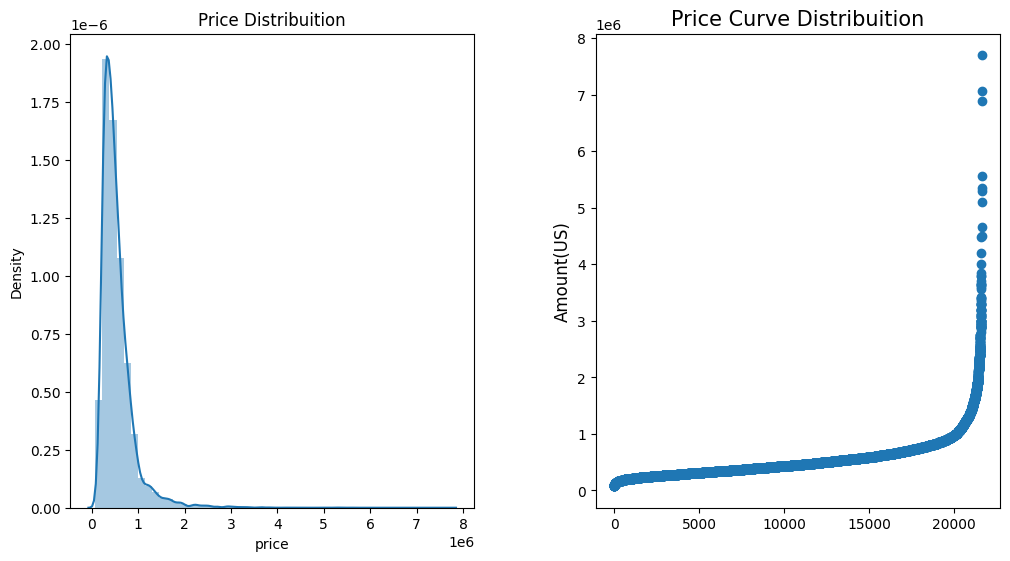

In [ ]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(df_usa['price'])

plt.subplot(122)
g1 = plt.scatter(range(df_usa.shape[0]), np.sort(df_usa.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

In [ ]:
print("Price Min")
print(df_usa['price'].min())
print("Price Mean")
print(df_usa['price'].mean())
print("Price Median")
print(df_usa['price'].median())
print("Price Max")
print(df_usa['price'].max())
print("Price Std")
print(df_usa['price'].std())

Price Min
75000.0
Price Mean
540088.1417665294
Price Median
450000.0
Price Max
7700000.0
Price Std
367127.1964826997


<Figure size 800x500 with 0 Axes>

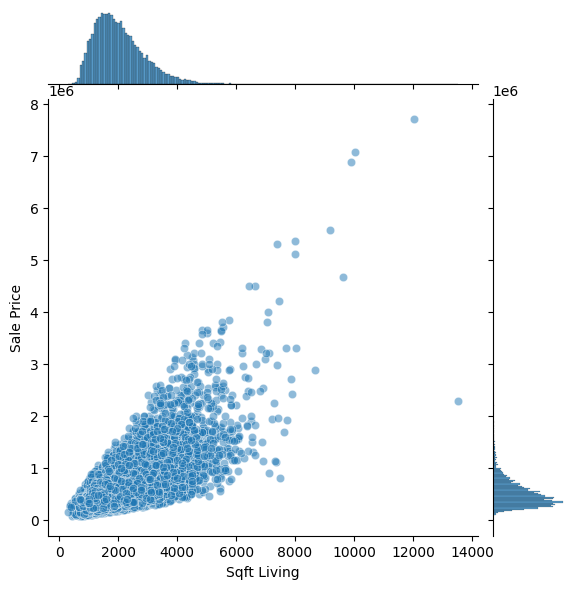

In [ ]:
plt.figure(figsize = (8, 5))
sns.jointplot(data=df_usa, x="sqft_living", y="price",
              alpha = 0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

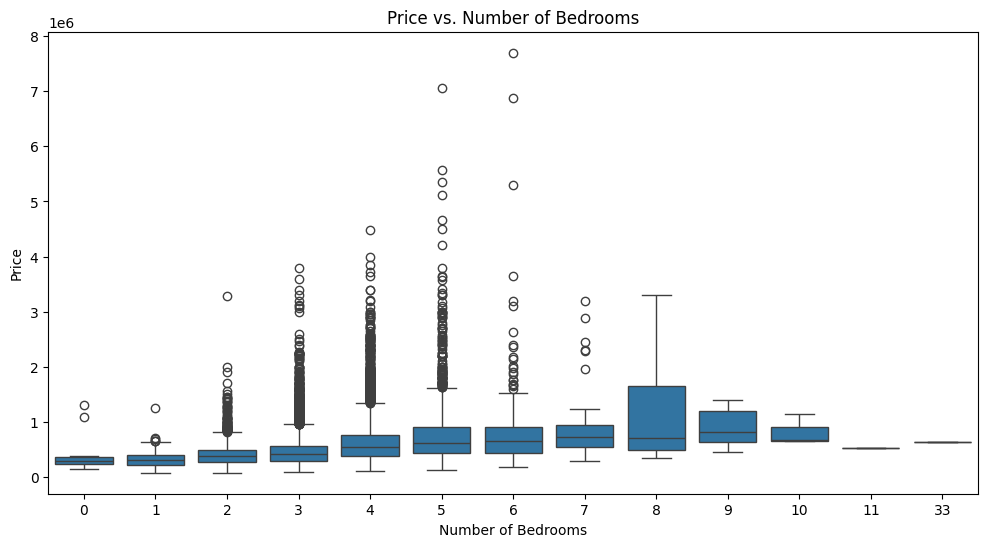

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=df_usa)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price vs. Number of Bedrooms")
plt.show()

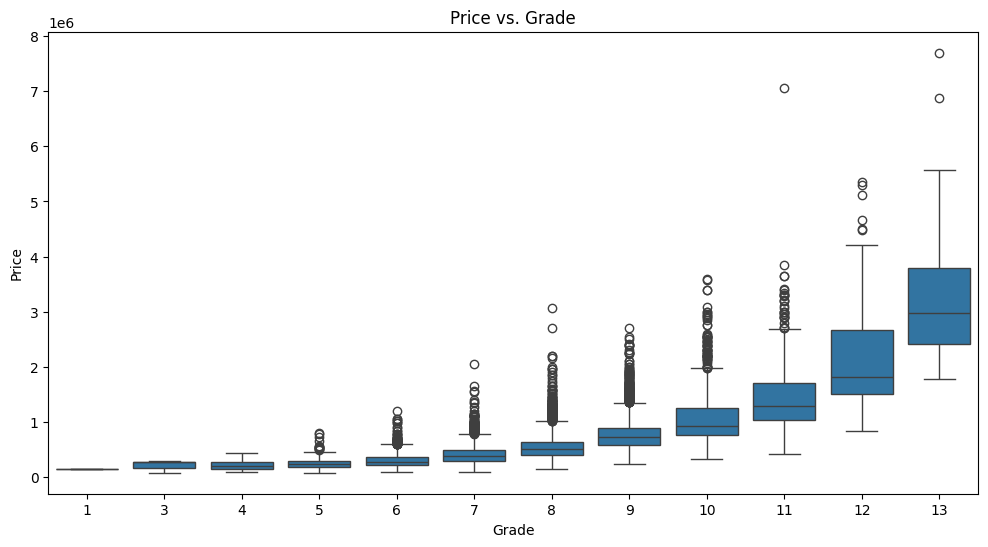

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='price', data=df_usa)
plt.xlabel("Grade")
plt.ylabel("Price")
plt.title("Price vs. Grade")
plt.show()

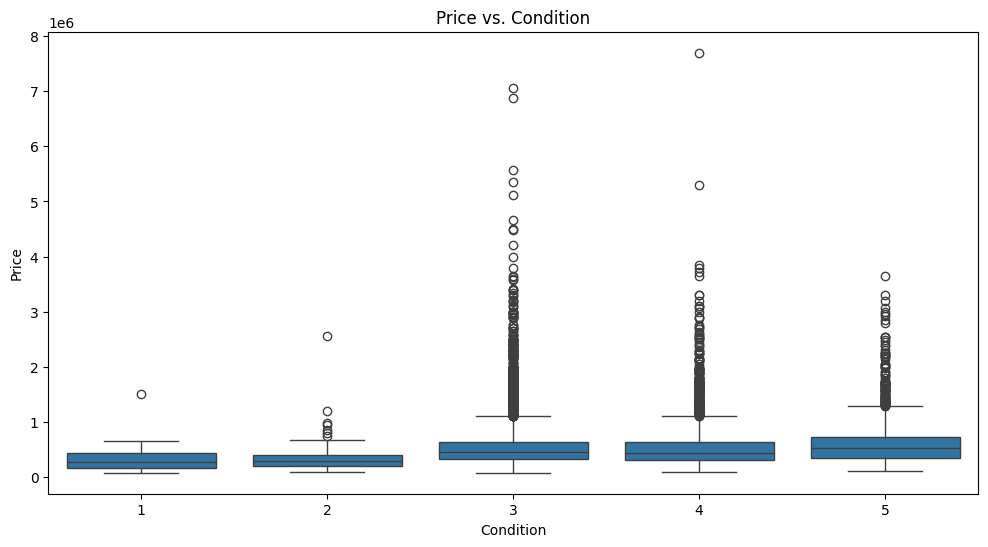

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=df_usa)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.title("Price vs. Condition")
plt.show()

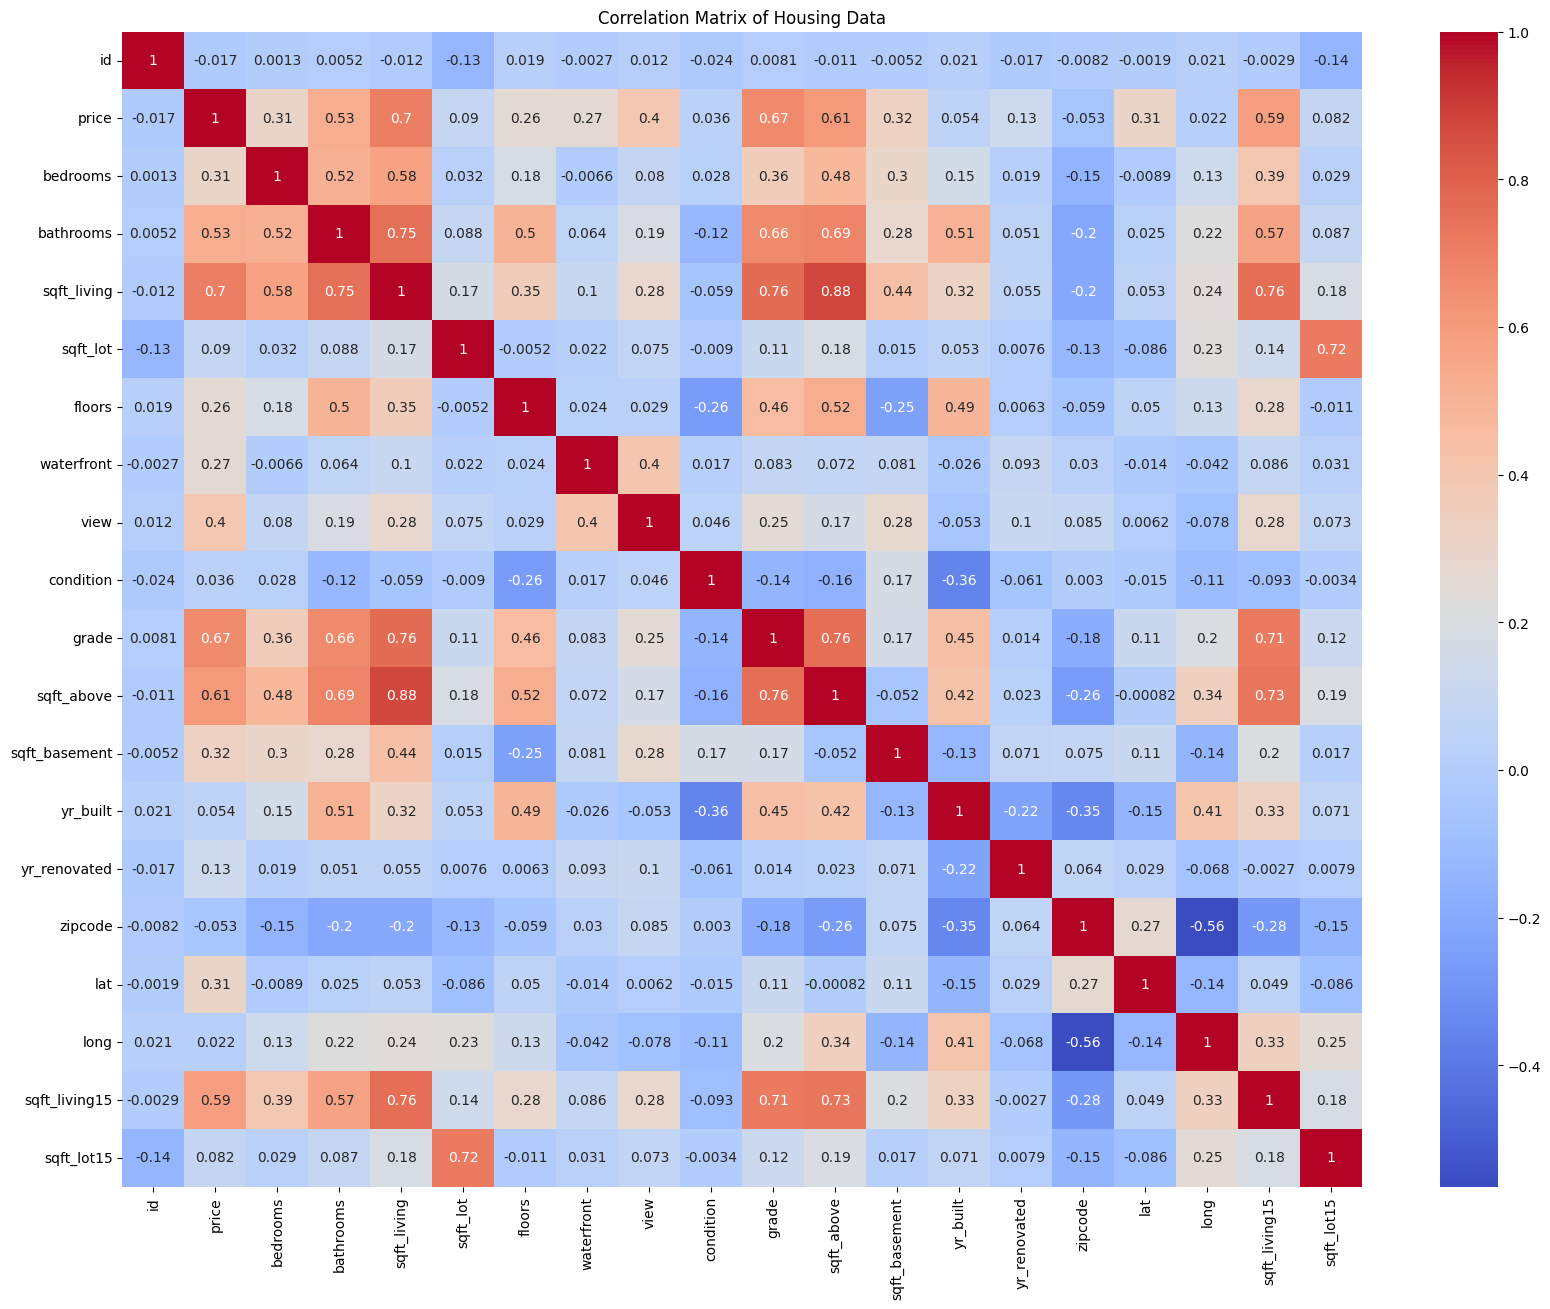

In [ ]:
df_usa_numeric = df_usa.drop('date', axis=1)
plt.figure(figsize=(20, 15))
correlation_matrix = df_usa_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Housing Data")
plt.show()

<Figure size 1200x800 with 0 Axes>

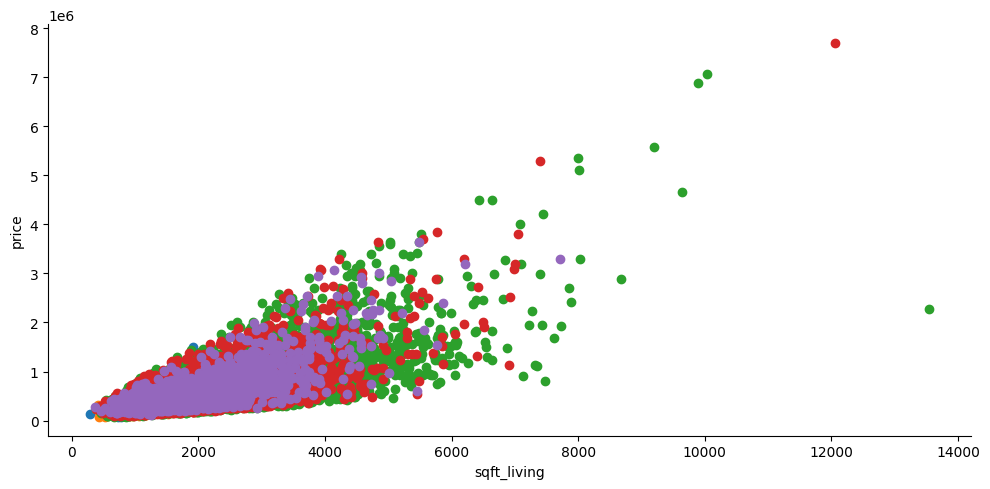

In [ ]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=df_usa, hue='condition', height=5, aspect=2)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

In [ ]:
#Exploring bathrooms columns by price and conditions

Freuency bathroom description:
bathrooms
2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: count, dtype: int64


/tmp/ipython-input-26-575401499.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
/tmp/ipython-input-26-575401499.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
/tmp/ipython-input-26-575401499.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)


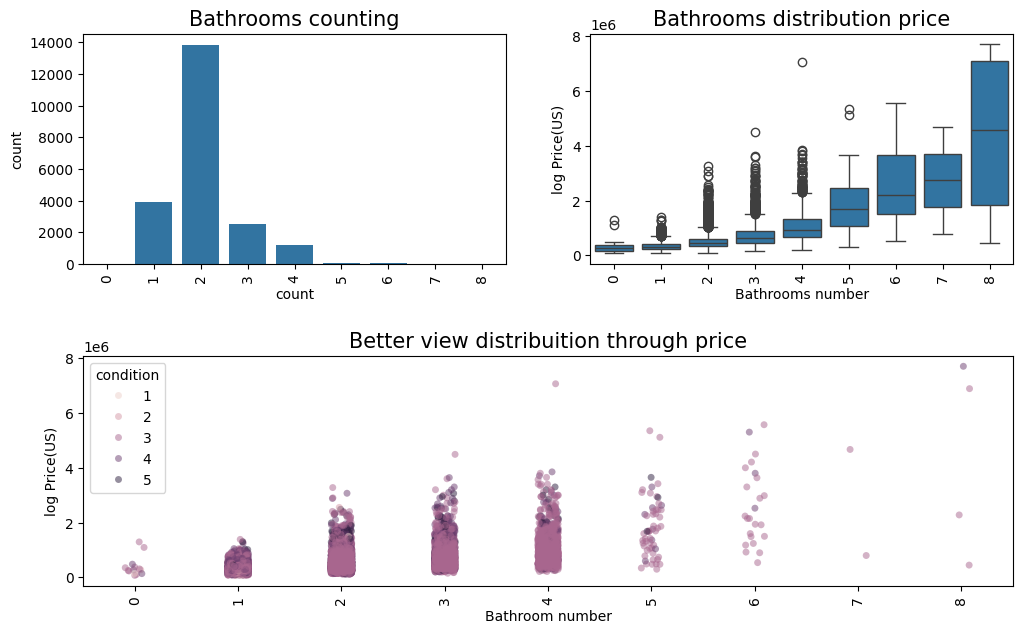

In [ ]:
df_usa["bathrooms"] = df_usa['bathrooms'].round(0).astype(int)

print("Freuency bathroom description:")
print(df_usa["bathrooms"].value_counts())

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bathrooms", data=df_usa,
                    ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Bathrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_xlabel("count")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="bathrooms", y='price',
                  data=df_usa, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Bathrooms distribution price", fontsize=15)
ax2.set_xlabel("Bathrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.stripplot(x="bathrooms", y="price",
                    data=df_usa, alpha=0.5,
                    jitter=True, hue="condition")
ax0.set_title("Better view distribuition through price", fontsize=15)
ax0.set_xlabel("Bathroom number")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()

Mean squared error: 134582326689.42


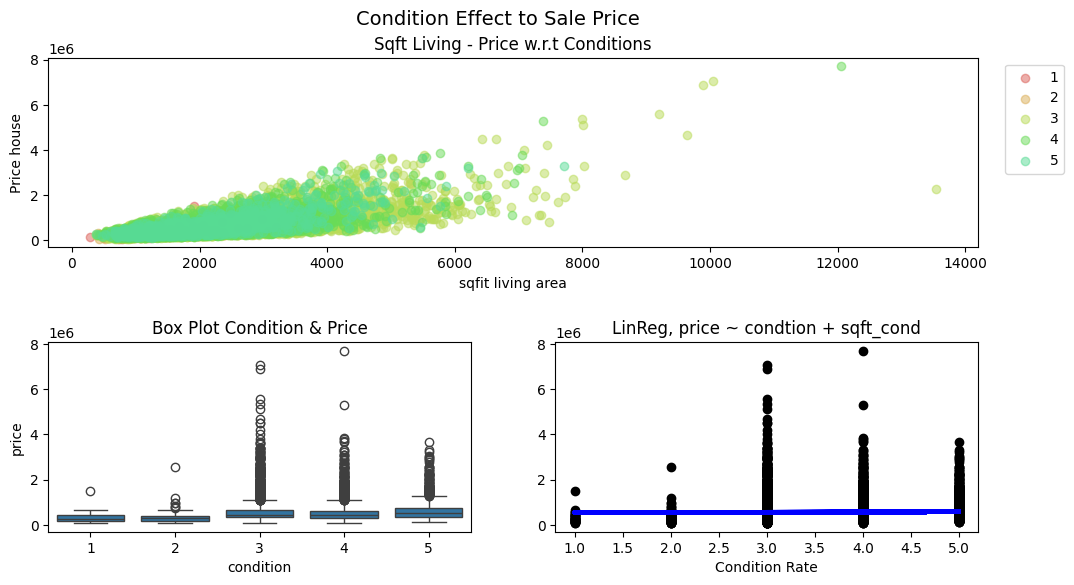

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax1.set_prop_cycle(color=sns.color_palette('hls', 10))
for val in range(1,6,1):
    indeX = df_usa.condition == val
    ax1.scatter(df_usa.sqft_living.loc[indeX], df_usa.price.loc[indeX], label = val, alpha=0.5)
ax1.legend(bbox_to_anchor = [1.1, 1])
ax1.set_xlabel('sqfit living area')
ax1.set_ylabel('Price house')
ax1.set_title('Sqft Living - Price w.r.t Conditions')

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = 'condition', y = 'price', data = df_usa, ax = ax2)
ax2.set_title('Box Plot Condition & Price', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
cubicQual = df_usa.groupby(['condition'])['price'].mean().round(0)
testTrain = df_usa.loc[:, ['condition', 'price']].copy()
testTrain['sqCond'] = np.power(testTrain['condition'],2)
mdl = linear_model.LinearRegression()
mdl.fit(testTrain[['condition', 'sqCond']], testTrain['price'])
y_pred = mdl.predict(testTrain[['condition', 'sqCond']])
print("Mean squared error: %.2f" % mean_squared_error(y_pred, testTrain.price))
# Plot outputs
ax3.scatter(testTrain['condition'], testTrain['price'],  color='black')
ax3.plot(testTrain['condition'], y_pred, color='blue', linewidth=3)
ax3.set_title('LinReg, price ~ condtion + sqft_cond', fontsize = 12)
ax3.set_xlabel('Condition Rate')
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.suptitle('Condition Effect to Sale Price', fontsize = 14)
plt.show()

#Exploring bathrooms columns by price and conditions

Freuency bathroom description:
bathrooms
2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: count, dtype: int64


/tmp/ipython-input-29-575401499.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
/tmp/ipython-input-29-575401499.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
/tmp/ipython-input-29-575401499.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)


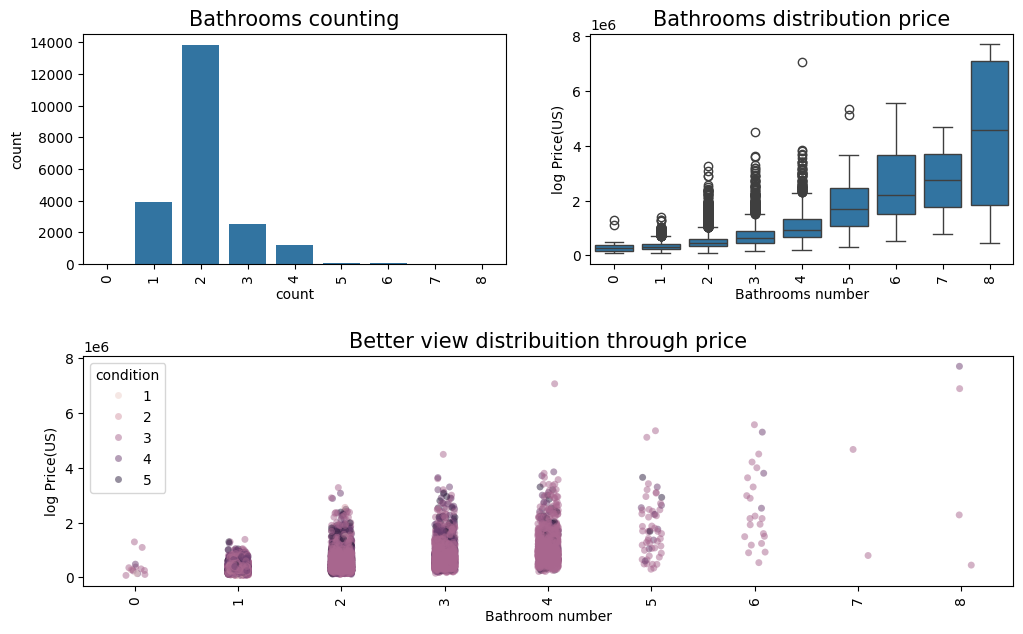

In [ ]:
df_usa["bathrooms"] = df_usa['bathrooms'].round(0).astype(int)

print("Freuency bathroom description:")
print(df_usa["bathrooms"].value_counts())

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bathrooms", data=df_usa,
                    ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Bathrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_xlabel("count")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="bathrooms", y='price',
                  data=df_usa, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Bathrooms distribution price", fontsize=15)
ax2.set_xlabel("Bathrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.stripplot(x="bathrooms", y="price",
                    data=df_usa, alpha=0.5,
                    jitter=True, hue="condition")
ax0.set_title("Better view distribuition through price", fontsize=15)
ax0.set_xlabel("Bathroom number")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()

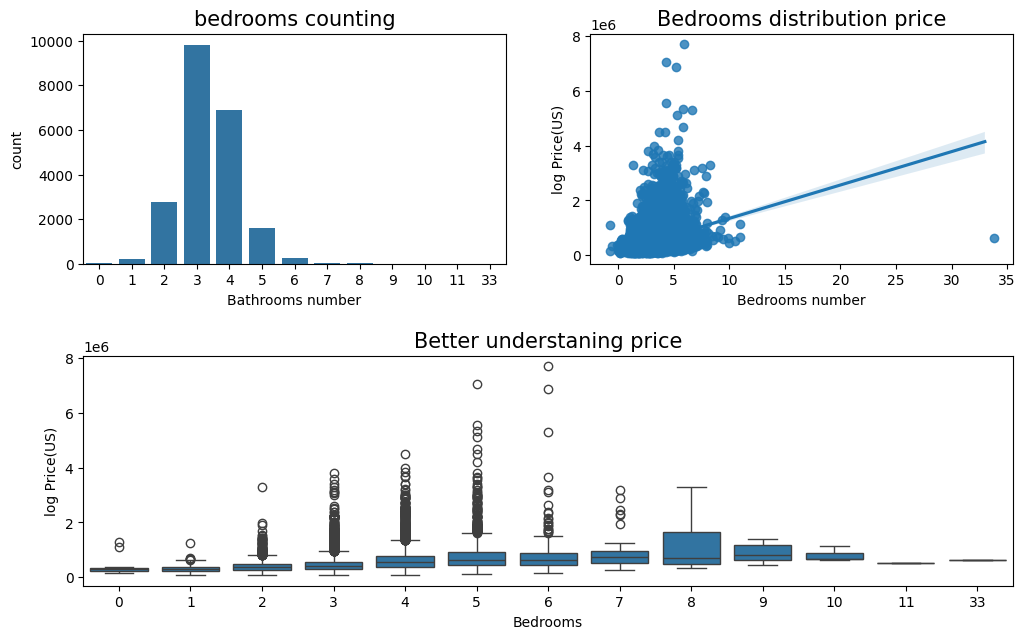

In [ ]:
bedrooms = df_usa.bedrooms.value_counts()


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bedrooms", data=df_usa,
                    ax=ax1)
ax1.set_title("bedrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_ylabel("count")

ax2 = plt.subplot(222)
ax2 = sns.regplot(x="bedrooms", y='price',
                  data=df_usa, ax=ax2, x_jitter=True)
ax2.set_title("Bedrooms distribution price", fontsize=15)
ax2.set_xlabel("Bedrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.boxplot(x="bedrooms", y="price",
                    data=df_usa)
ax0.set_title("Better understaning price", fontsize=15)
ax0.set_xlabel("Bedrooms")
ax0.set_ylabel("log Price(US)")

plt.show()

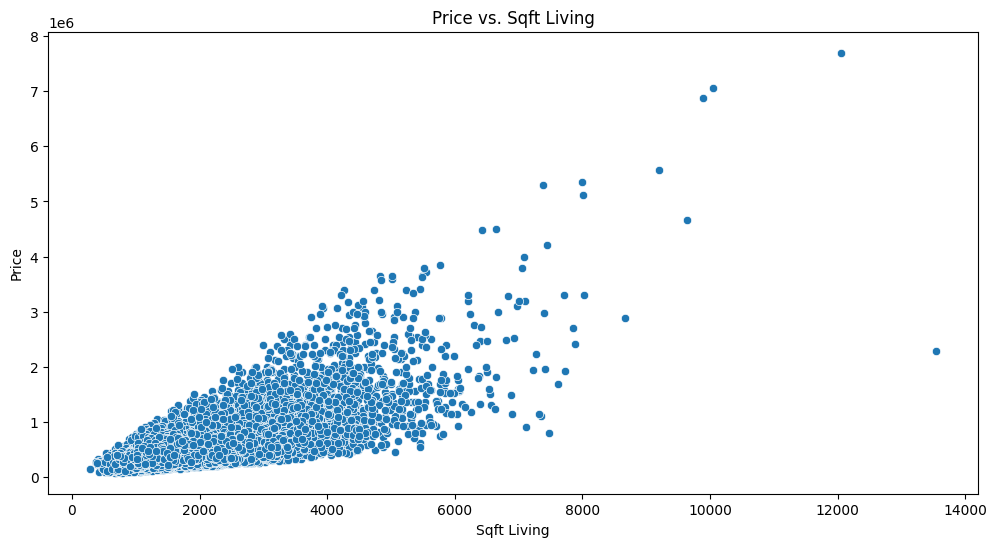

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqft_living', y='price', data=df_usa)
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("Price vs. Sqft Living")
plt.show()

Floors counting description
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64


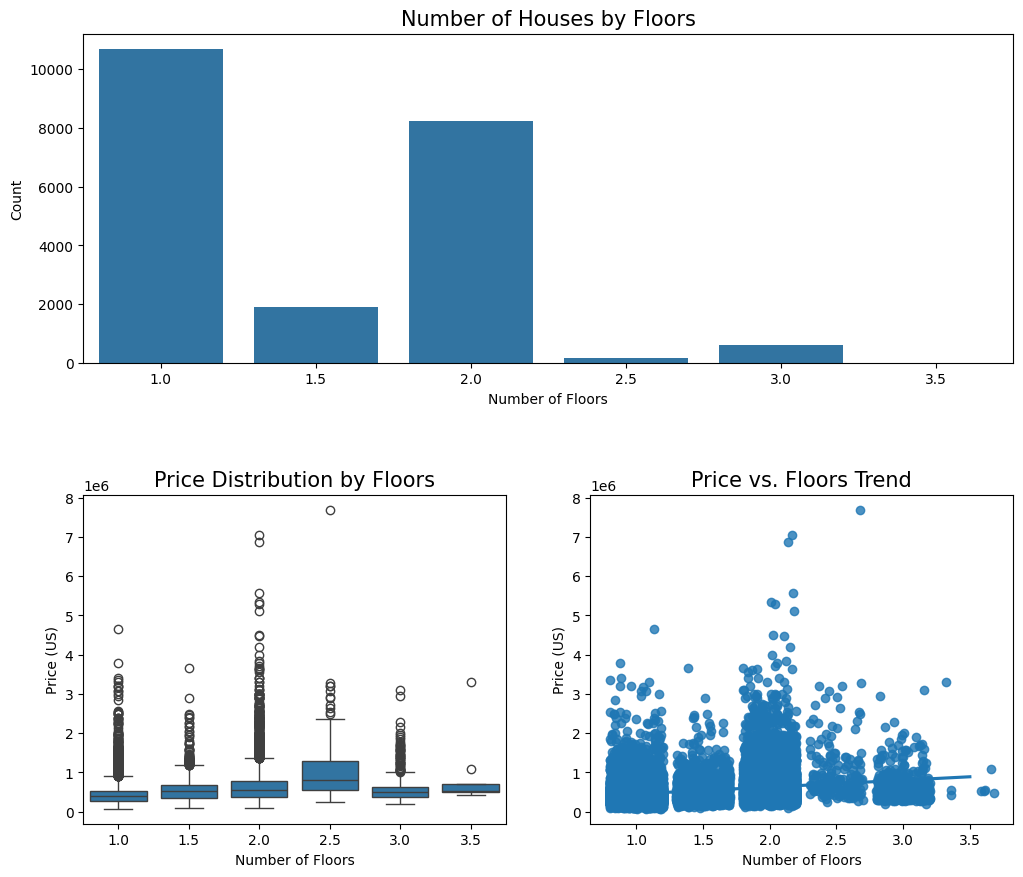

In [ ]:
print("Floors counting description")
print(df_usa['floors'].value_counts())


plt.figure(figsize = (12,10))
plt.subplots_adjust(hspace = 0.4, top = 0.9)

# Subplot 1: Countplot of floors
ax1 = plt.subplot(211)
sns.countplot(x="floors", data=df_usa, ax=ax1)
ax1.set_title("Number of Houses by Floors", fontsize=15)
ax1.set_xlabel("Number of Floors")
ax1.set_ylabel("Count")

# Subplot 2: Boxplot of price by floors
ax2 = plt.subplot(223)
sns.boxplot(x="floors", y="price", data=df_usa, ax=ax2)
ax2.set_title("Price Distribution by Floors", fontsize=15)
ax2.set_xlabel("Number of Floors")
ax2.set_ylabel("Price (US)")

# Subplot 3: Regression plot of price by floors
ax3 = plt.subplot(224)
sns.regplot(x="floors", y="price", data=df_usa, ax=ax3, x_jitter=0.2)
ax3.set_title("Price vs. Floors Trend", fontsize=15)
ax3.set_xlabel("Number of Floors")
ax3.set_ylabel("Price (US)")


plt.show()

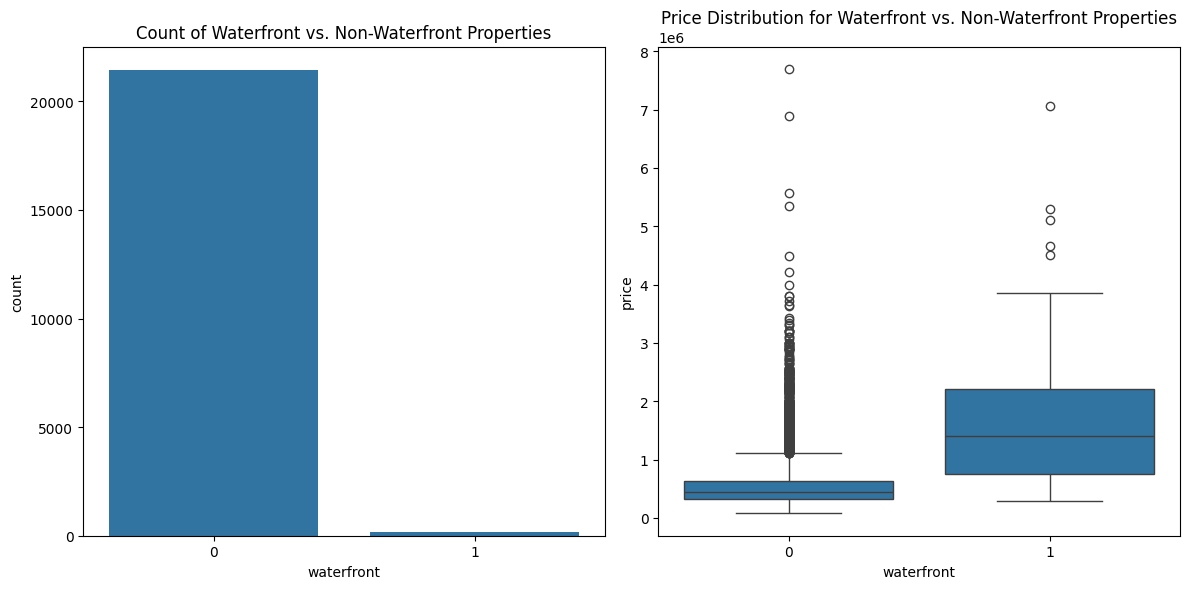

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='waterfront', data=df_usa)
plt.title('Count of Waterfront vs. Non-Waterfront Properties')

plt.subplot(1, 2, 2)
sns.boxplot(x='waterfront', y='price', data=df_usa)
plt.title('Price Distribution for Waterfront vs. Non-Waterfront Properties')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

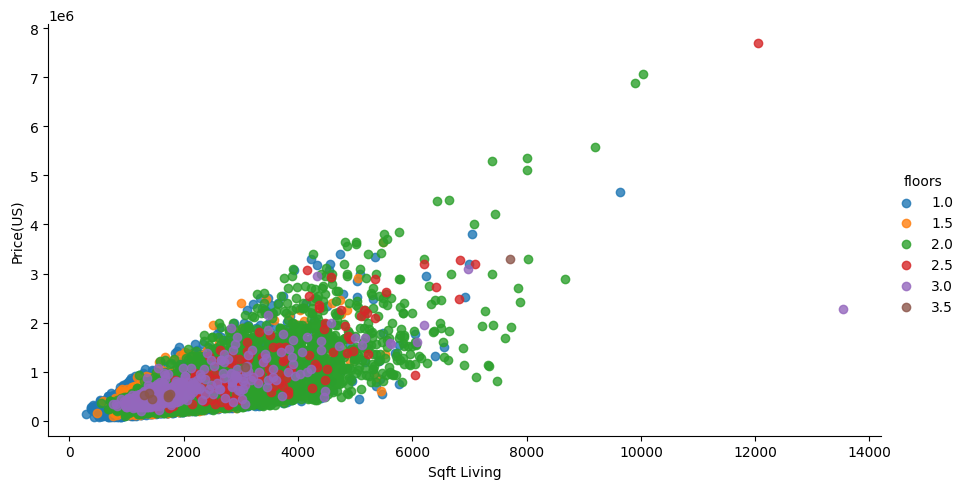

In [ ]:
plt.figure(figsize = (12,8))
g=sns.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df_usa, hue="floors", fit_reg=False)
g.set_titles("Floors by sqft_living and price", fontsize=15)
g.set_xlabels("Sqft Living")
g.set_ylabels("Price(US)")
plt.show()

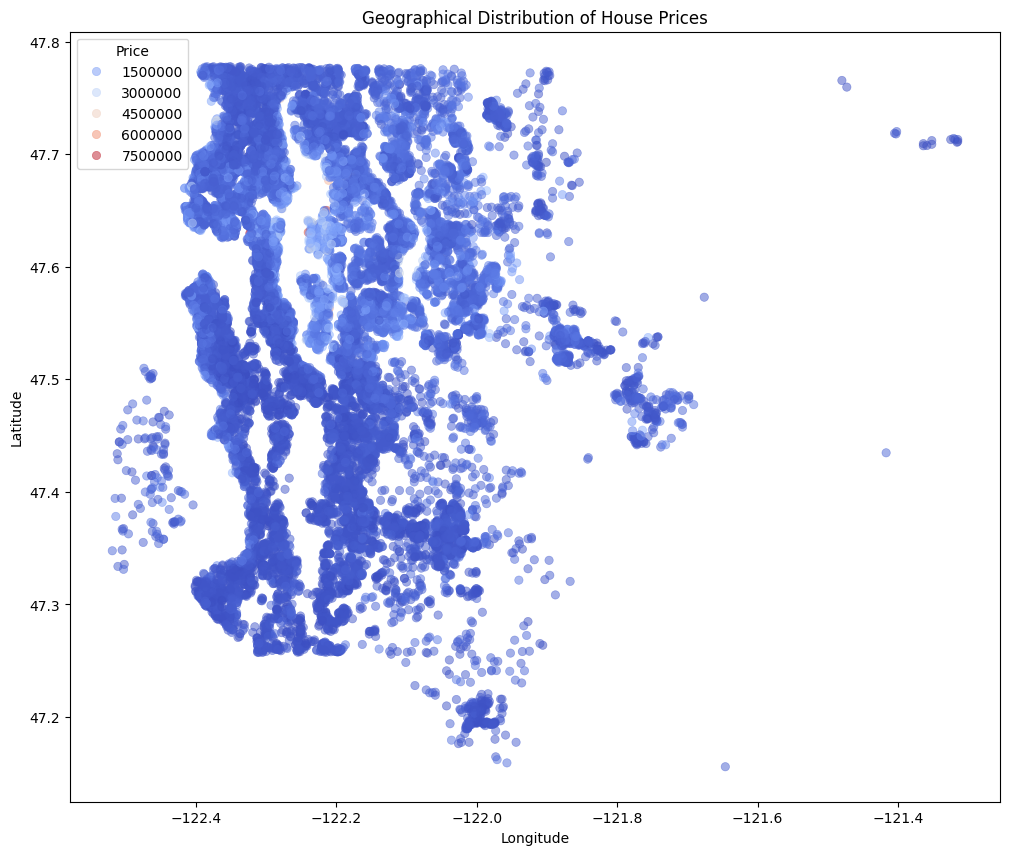

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='long', y='lat', data=df_usa, hue='price', palette='coolwarm', edgecolor=None, alpha=0.5)
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price')
plt.show()

Grade counting description
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64


/tmp/ipython-input-40-1190932288.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
/tmp/ipython-input-40-1190932288.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
/tmp/ipython-input-40-1190932288.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)


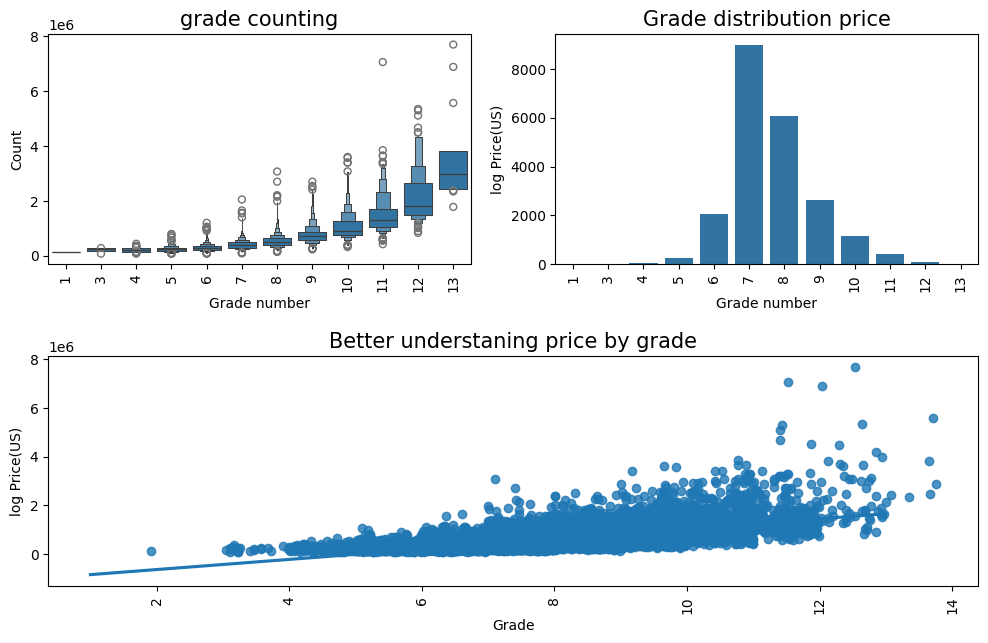

In [ ]:
print("Grade counting description")
print(df_usa['grade'].value_counts())


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.boxenplot(x="grade", y='price',
                    data=df_usa, ax=ax1, )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("grade counting", fontsize=15)
ax1.set_xlabel("Grade number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sns.countplot(x="grade",
                  data=df_usa, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Grade distribution price", fontsize=15)
ax2.set_xlabel("Grade number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="grade", y="price",
                    data=df_usa, x_jitter=True)
ax0.set_title("Better understaning price by grade", fontsize=15)
ax0.set_xlabel("Grade")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()

<Figure size 1200x800 with 0 Axes>

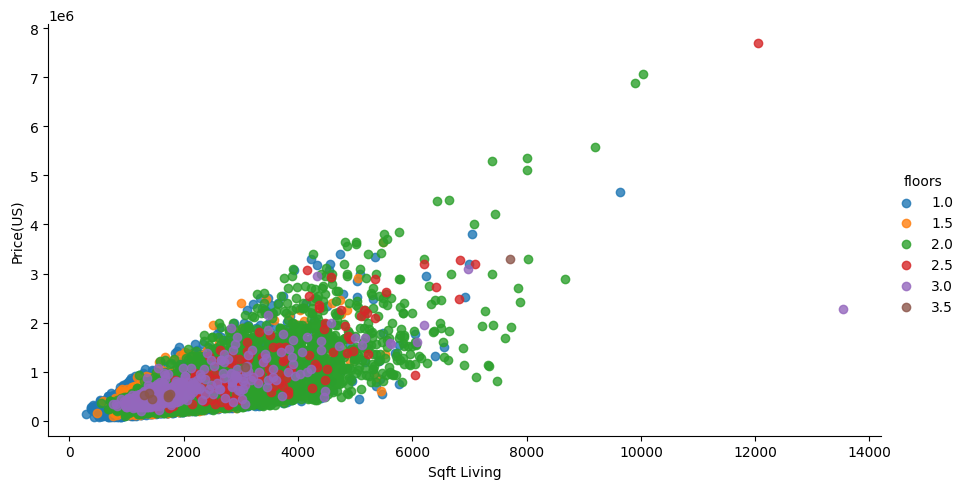

In [ ]:
plt.figure(figsize = (12,8))
g=sns.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df_usa, hue="floors", fit_reg=False)
g.set_titles("Floors by sqft_living and price", fontsize=15)
g.set_xlabels("Sqft Living")
g.set_ylabels("Price(US)")
plt.show()

In [ ]:
#Clearly view of bathrooms and bedrooms correlation

bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_usa[bath[0]], df_usa[bath[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,,
0,7,4,2,0,1,0,0,0,0,0,0,0,0
1,2,167,1587,1800,327,43,6,1,0,0,0,0,0
2,4,28,1129,7186,4709,695,90,7,1,0,1,0,1
3,0,0,41,656,1219,506,88,7,6,2,1,1,0
4,0,0,1,182,601,321,72,17,4,3,0,0,0
5,0,0,0,0,19,22,12,2,1,0,1,0,0
6,0,0,0,0,6,13,2,2,1,0,0,0,0
7,0,0,0,0,0,1,0,1,0,0,0,0,0
8,0,0,0,0,0,0,2,1,0,1,0,0,0


In [ ]:
bath_cond = ['bathrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_usa[bath_cond[0]], df_usa[bath_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bathrooms,,,,,
0,1,1,9,3,0
1,20,91,2211,1300,311
2,9,75,9000,3702,1065
3,0,5,1713,553,256
4,0,0,1026,109,66
5,0,0,46,8,3
6,0,0,21,3,0
7,0,0,2,0,0
8,0,0,3,1,0


In [ ]:
bed_cond = ['bedrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_usa[bed_cond[0]], df_usa[bed_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bedrooms,,,,,
0,1,1,10,1,0
1,4,11,124,48,12
2,12,51,1779,718,200
3,8,69,6308,2711,728
4,4,36,4580,1682,580
5,0,1,1031,418,151
6,1,3,158,87,23
7,0,0,25,9,4
8,0,0,8,3,2


In [ ]:
cond_water = ['condition', 'waterfront']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_usa[cond_water[0]], df_usa[cond_water[1]]).style.background_gradient(cmap = cm)

waterfront,0,1
condition,,
1,29,1
2,171,1
3,13940,91
4,5629,50
5,1681,20


In [ ]:
grade_cond = ['grade', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_usa[grade_cond[0]], df_usa[grade_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
grade,,,,,
1,1,0,0,0,0
3,0,1,1,0,1
4,1,5,13,10,0
5,9,15,100,84,34
6,11,59,1035,685,248
7,6,75,5234,2833,833
8,2,13,4269,1394,390
9,0,2,2041,446,126
10,0,2,921,156,55


In [ ]:
grade_bed = ['grade', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_usa[grade_bed[0]], df_usa[grade_bed[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
grade,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,0,0,0
4,2,12,14,1,0,0,0,0,0,0,0,0,0
5,0,37,114,62,21,5,3,0,0,0,0,0,0
6,0,78,824,854,233,41,7,1,0,0,0,0,0
7,6,52,1205,4917,2177,501,98,11,6,4,2,1,1
8,3,14,499,2796,2194,455,90,12,4,1,0,0,0
9,0,2,78,832,1351,313,33,4,1,0,1,0,0
10,0,1,21,296,615,173,22,5,1,0,0,0,0


In [ ]:
grade_bath = ['grade', 'bathrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_usa[grade_bath[0]], df_usa[grade_bath[1]]).style.background_gradient(cmap = cm)

bathrooms,0,1,2,3,4,5,6,7,8
grade,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0
4,0,28,1,0,0,0,0,0,0
5,1,204,36,1,0,0,0,0,0
6,2,1441,574,18,3,0,0,0,0
7,4,2104,6216,575,75,6,0,0,1
8,3,145,4788,882,244,4,2,0,0
9,0,9,1671,629,303,3,0,0,0
10,0,0,480,309,333,11,1,0,0


In [ ]:
#Correlation matrix

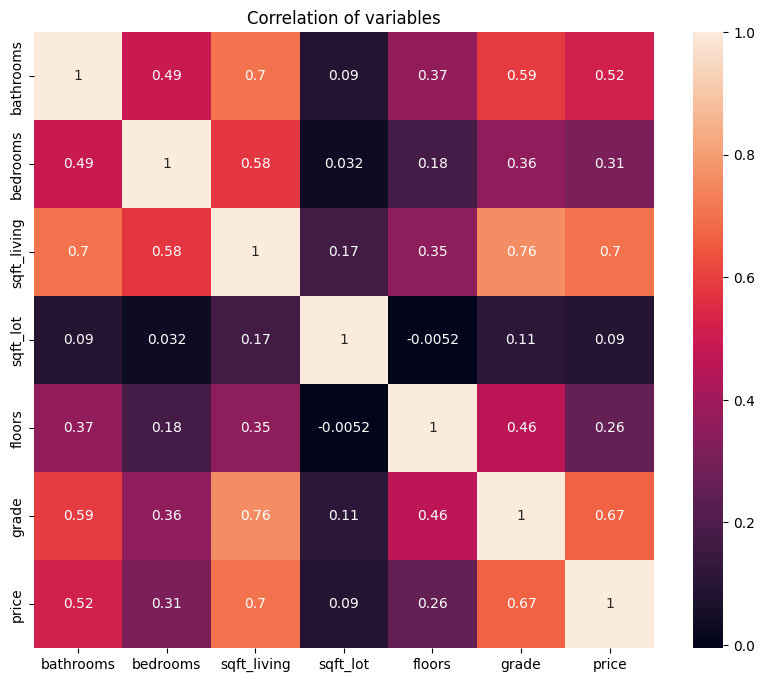

In [ ]:
corr = df_usa[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

/tmp/ipython-input-51-2618938388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_usa['yr_built'])


<Axes: xlabel='yr_built', ylabel='Density'>

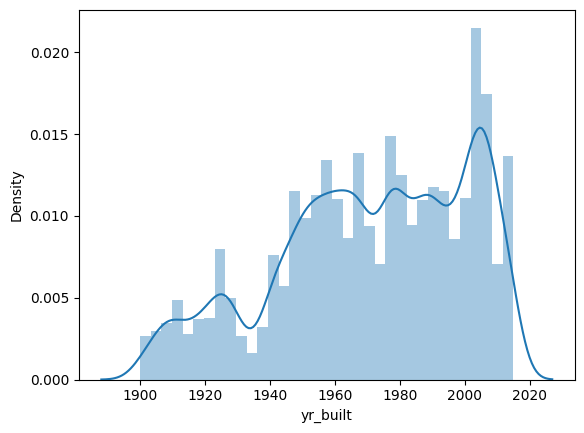

In [ ]:
sns.distplot(df_usa['yr_built'])


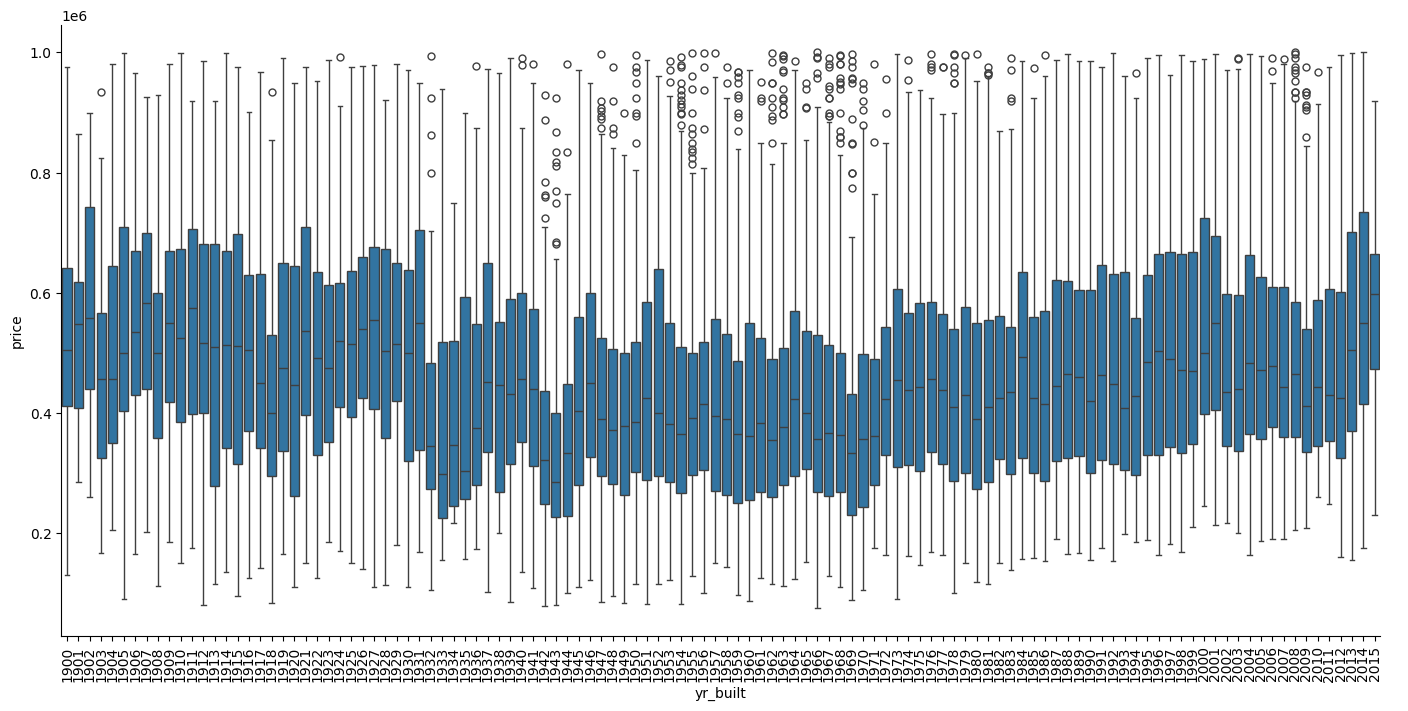

In [ ]:
g = sns.catplot(x="yr_built", y = "price", data=df_usa[df_usa['price'] < 1000000],
                   height= 7, aspect = 2, kind="box" )
g.set_xticklabels(rotation=90)
plt.show()

In [ ]:
df_usa = df_usa.merge(pd.get_dummies(df_usa.floors, drop_first=True, prefix='Floors'), left_index=True, right_index=True)
df_usa = df_usa.merge(pd.get_dummies(df_usa.waterfront, drop_first=True, prefix='watFront'), left_index=True, right_index=True)
df_usa = df_usa.merge(pd.get_dummies(df_usa.view, drop_first=True, prefix='View'), left_index=True, right_index=True)
df_usa = df_usa.merge(pd.get_dummies(df_usa.condition, drop_first=True, prefix='Cond'), left_index=True, right_index=True)
df_usa = df_usa.merge(pd.get_dummies(df_usa.grade, prefix='Grade'), left_index=True, right_index=True)
df_usa = df_usa.merge(pd.get_dummies(df_usa.bedrooms, drop_first=True, prefix='Bedrooms'), left_index=True, right_index=True)

In [ ]:
del df_usa['floors'],
del df_usa['waterfront']
del df_usa['view']
del df_usa['condition']
del df_usa['grade']
del df_usa['bedrooms']

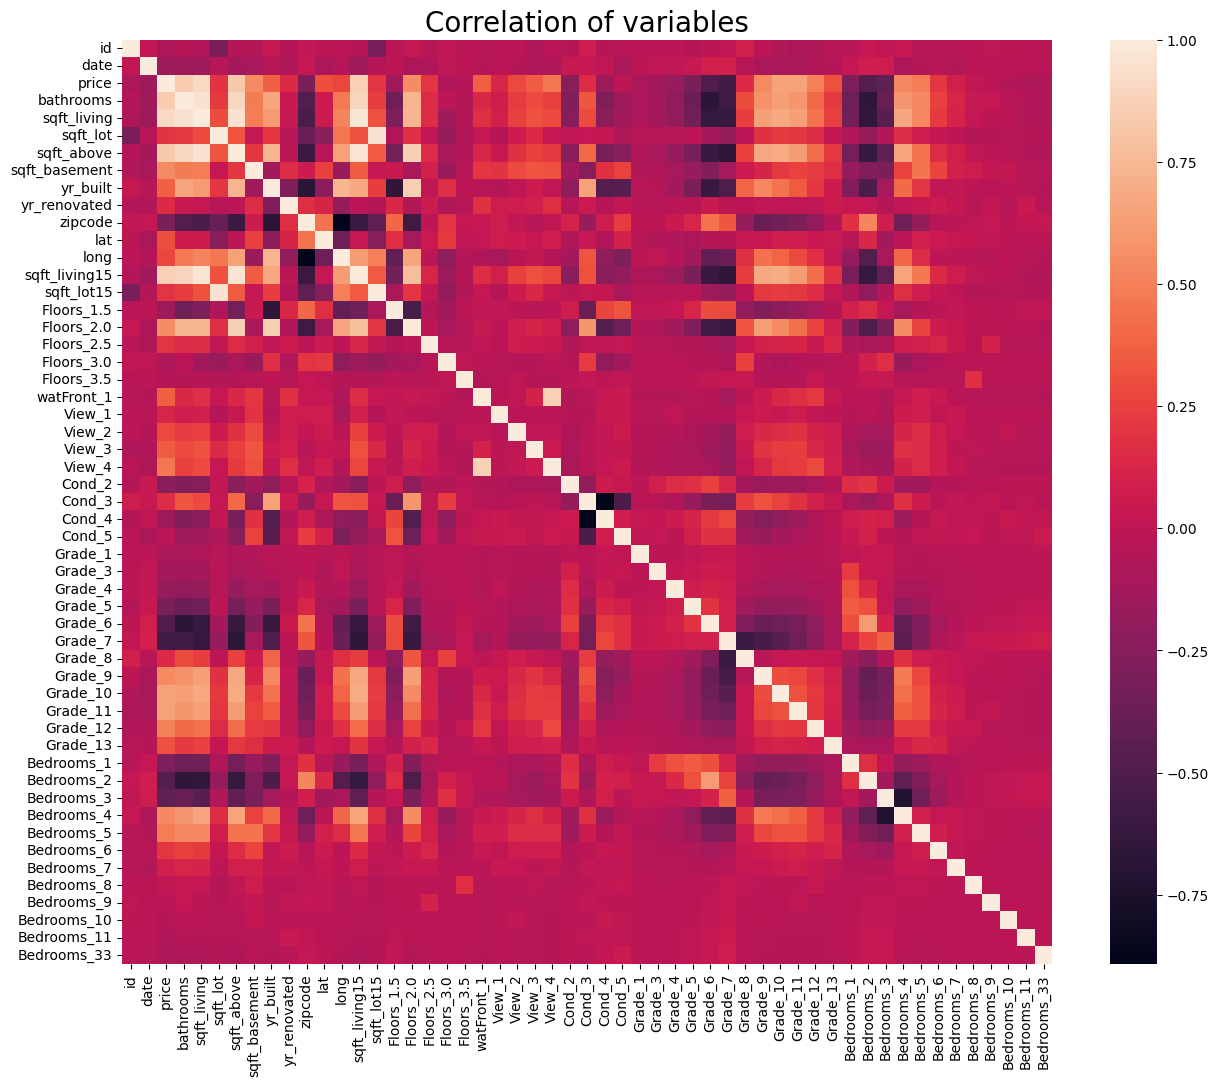

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Correlation of variables', fontsize=20)
sns.heatmap(df_usa.corr().astype(float).corr(),vmax=1.0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
X = df_usa.drop("price",axis=1).values
y = df_usa["price"].values.ravel()

In [ ]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [ ]:
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test
select_X_test = selection.transform(X_test)

Scaled_Ridge: 0.725729 (+/- 0.014921)
Scaled_Lasso: 0.680499 (+/- 0.021471)
Scaled_Elastic: 0.699998 (+/- 0.011722)
Scaled_SVR: 0.671885 (+/- 0.012077)
Scaled_RF_reg: 0.864318 (+/- 0.018050)
Scaled_ET_reg: 0.869143 (+/- 0.014951)
Scaled_BR_reg: 0.849139 (+/- 0.013165)
Scaled_Hub-Reg: 0.701487 (+/- 0.010669)
Scaled_BayRidge: 0.725839 (+/- 0.014791)
Scaled_XGB_reg: 0.878112 (+/- 0.011036)
Scaled_DT_reg: 0.742372 (+/- 0.036827)
Scaled_KNN_reg: 0.719752 (+/- 0.009845)
Scaled_Gboost-Reg: 0.856541 (+/- 0.017862)
Scaled_RFR_PCA: 0.648795 (+/- 0.031710)
Scaled_XGBR_PCA: 0.610253 (+/- 0.043603)


/tmp/ipython-input-66-2743973428.py:142: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)
/tmp/ipython-input-66-2743973428.py:145: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


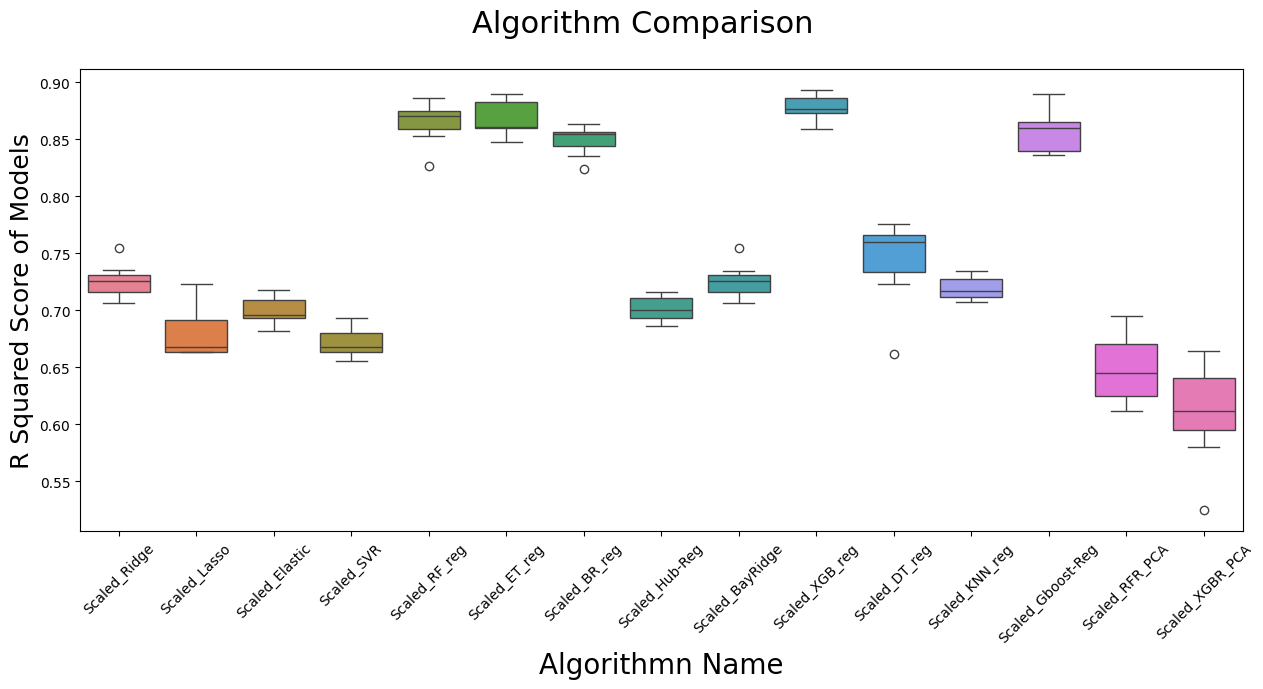

In [ ]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ])))

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ])))
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ])))

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ])))

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ])))

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
#pipelines.append(
#                ("Scaled_ADA-Reg",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("ADA-reg", AdaBoostRegressor())
#                 ])))

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], []

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)
    names.append(name)
    results.append(cv_results)
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [ ]:
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
y_hat = xgb.predict(X_test)


In [ ]:
xgb.score(X_test,y_test)


0.8967299839276387

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
#Using Random Search to find the best Hyper Paramns

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, verbose=2)

In [ ]:
#Knowning the best params
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [ ]:
# Predicting with best params
y_hat_Search = rf_random.predict(X_test)

In [ ]:
#Printing the difference between the 2 models scores

In [ ]:
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, y_test),4)))
print("\nMSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

XGBoost Regressor R2-score: 0.8768
RandomForest Regressor Prediction R2-score: 0.8337

MSE of XGBoost Regressor: 40163.0
MSE of RandomForest Regressor: 40895.75159235671 


In [ ]:
df_usa['price_per_sqft'] = df_usa['price'] / df_usa['sqft_living']


In [ ]:
df_usa['age_of_house'] = 2025 - df_usa['yr_built']


In [ ]:
df_usa['renovated_flag'] = df_usa['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
Q1 = df_usa['price'].quantile(0.25)
Q3 = df_usa['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_usa = df_usa[(df_usa['price'] >= lower_bound) & (df_usa['price'] <= upper_bound)]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['sqft_living', 'bathrooms', 'price_per_sqft', 'age_of_house']

df_usa.loc[:, columns_to_scale] = scaler.fit_transform(df_usa[columns_to_scale])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_usa[columns_to_scale] = scaler.fit_transform(df_usa[columns_to_scale])


/tmp/ipython-input-89-910063454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa[columns_to_scale] = scaler.fit_transform(df_usa[columns_to_scale])


In [ ]:
# Safe drop: Only drop if the columns exist
columns_to_drop = ['id', 'date', 'yr_built', 'yr_renovated']
df_usa.drop(columns=[col for col in columns_to_drop if col in df_usa.columns], inplace=True)


/tmp/ipython-input-94-582309307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.drop(columns=[col for col in columns_to_drop if col in df_usa.columns], inplace=True)


In [ ]:
print(df_usa.columns.tolist())


['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Floors_1.5', 'Floors_2.0', 'Floors_2.5', 'Floors_3.0', 'Floors_3.5', 'watFront_1', 'View_1', 'View_2', 'View_3', 'View_4', 'Cond_2', 'Cond_3', 'Cond_4', 'Cond_5', 'Grade_1', 'Grade_3', 'Grade_4', 'Grade_5', 'Grade_6', 'Grade_7', 'Grade_8', 'Grade_9', 'Grade_10', 'Grade_11', 'Grade_12', 'Grade_13', 'Bedrooms_1', 'Bedrooms_2', 'Bedrooms_3', 'Bedrooms_4', 'Bedrooms_5', 'Bedrooms_6', 'Bedrooms_7', 'Bedrooms_8', 'Bedrooms_9', 'Bedrooms_10', 'Bedrooms_11', 'Bedrooms_33', 'price_per_sqft', 'age_of_house', 'renovated_flag']


In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Replace with your actual selected features
X = df_usa.drop('price', axis=1)
y = df_usa['price']

# Split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}


In [ ]:
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.7, 1]},
             scoring='r2', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score on Validation Set:", grid_search.best_score_)

# Test on real unseen data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test R2 Score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Best R2 Score on Validation Set: 0.9983185025906204
Test R2 Score: 0.9981580539642957
Test MAE: 3894.6514067843186


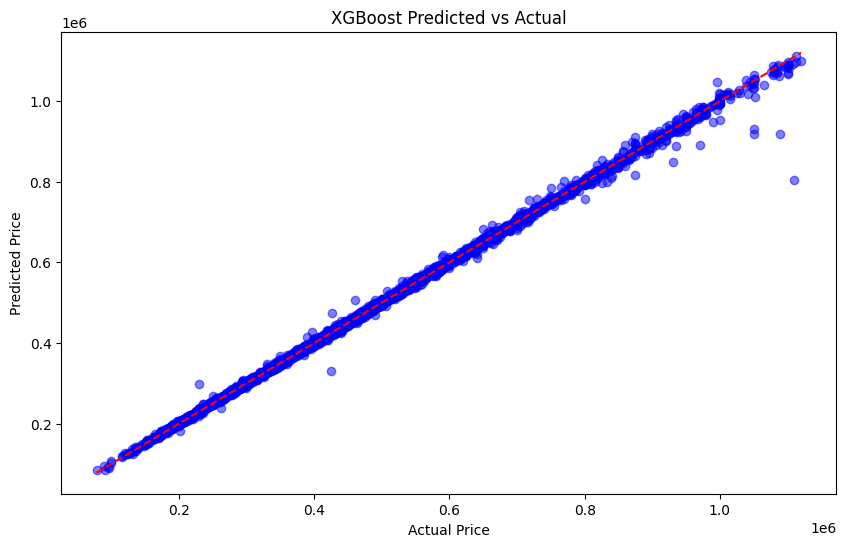

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Assuming you've already created X and y
# If not:
# X = df_usa.drop('price', axis=1)
# y = df_usa['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [ ]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}


In [ ]:
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid,
                              cv=3,
                              scoring='r2',
                              verbose=1,
                              n_jobs=-1)

grid_search_rf.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", l

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [ ]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best R2 Score (CV):", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Test R2 Score:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score (CV): 0.9465413876793689
Test R2 Score: 0.9519450025895652
Test MAE: 28049.21077186126


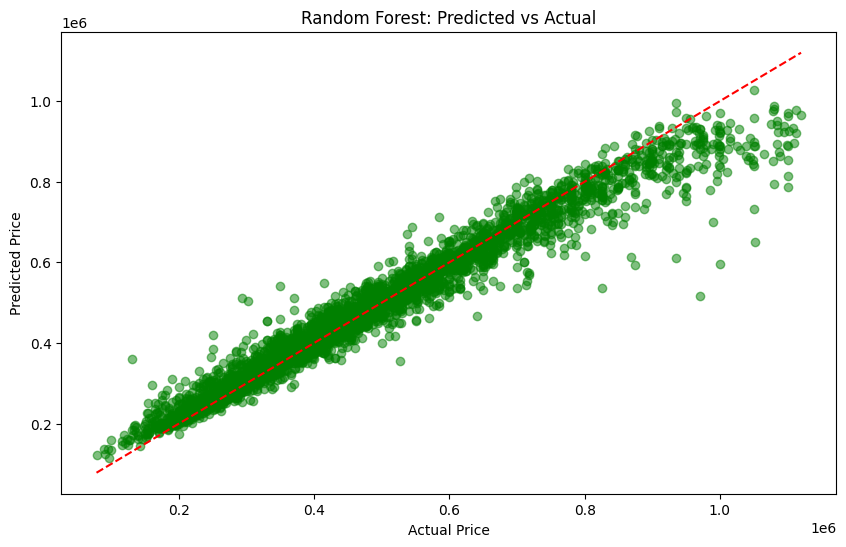

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [ ]:
pip install shap


In [ ]:
import shap

# Create a SHAP explainer for your model
explainer = shap.Explainer(best_rf, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

100%|===================| 4093/4094 [41:18<00:00]       

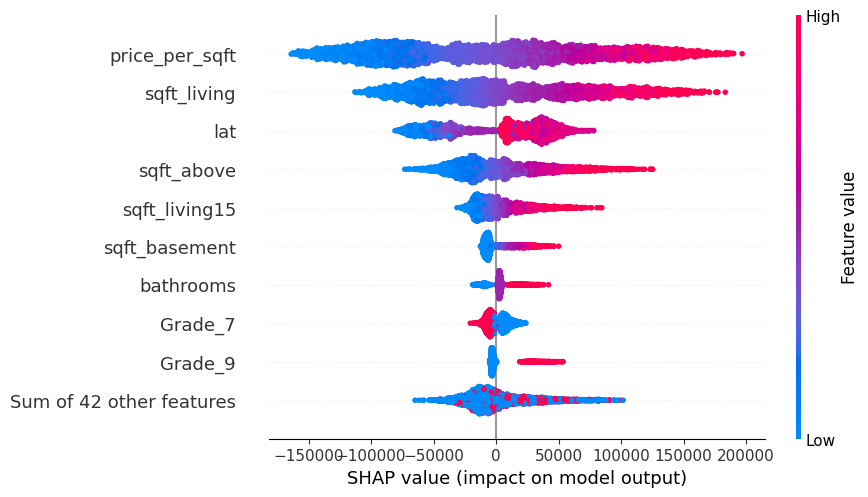

In [ ]:
shap.plots.beeswarm(shap_values)


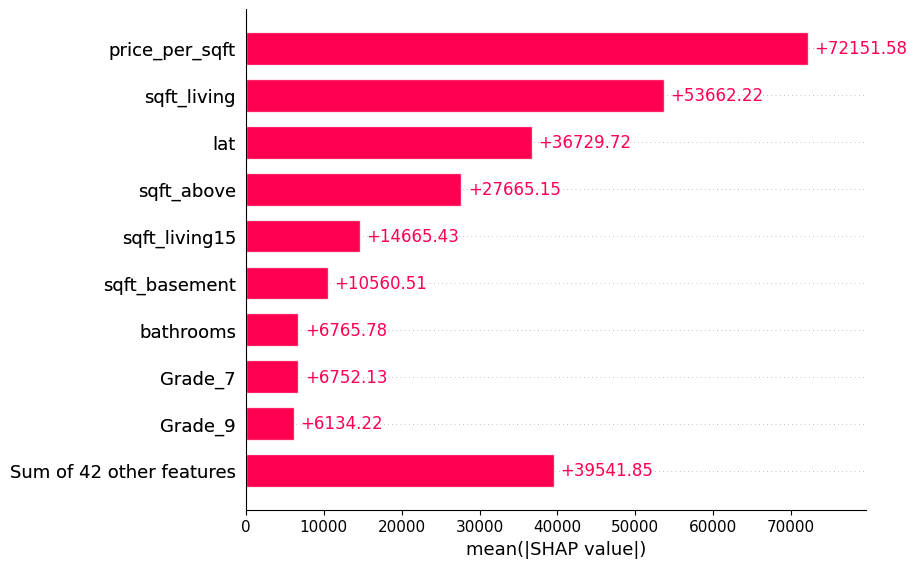

In [ ]:
shap.plots.bar(shap_values)


In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])#🔴 Red: pushes the price up🔵 Blue: pushes it down
